# Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Dataset

In [2]:
#Download Credit dataset from UCI Machine Learning Repository
import wget

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
creditDataSet = wget.download(url)

In [3]:
pd.set_option('display.max_columns' , 16)

attributes = ['Gender','Age','Debt','MaritalStatus','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','Zipcode','Income','Approval']
credit = pd.read_csv(creditDataSet, sep=',', header = None, names = attributes)
credit.head(10)

,Gender,Age,Debt,MaritalStatus,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Zipcode,Income,Approval
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


# Data Processing

In [4]:
#allowing cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
#Feature Extraction
columns = ['Age','Debt','BankCustomer', 'YearsEmployed','PriorDefault','Employed','CreditScore','Income','Approval']
credit1 = credit.loc[:,columns]
credit1.head()

,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approval
0,30.83,0.000,g,1.25,t,t,1,0,+
1,58.67,4.460,g,3.04,t,t,6,560,+
2,24.50,0.500,g,1.50,t,f,0,824,+
3,27.83,1.540,g,3.75,t,t,5,3,+
4,20.17,5.625,g,1.71,t,f,0,0,+


In [6]:
credit1.replace('?', np.NaN, inplace= True)
credit1.shape
credit1.dropna(inplace=True)
credit1.isnull().any()

(690, 9)

Age              False
Debt             False
BankCustomer     False
YearsEmployed    False
PriorDefault     False
Employed         False
CreditScore      False
Income           False
Approval         False
dtype: bool

In [7]:
credit1.describe()
credit1.values
credit1.dropna(inplace = True)

,Debt,YearsEmployed,CreditScore,Income
count,672.000000,672.000000,672.000000,672.000000
mean,4.820283,2.228951,2.456845,1030.358631
std,4.998978,3.359155,4.913370,5274.508579
min,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000
50%,2.792500,1.000000,0.000000,5.000000
75%,7.500000,2.595000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


array([['30.83', 0.0, 'g', ..., 1, 0, '+'],
       ['58.67', 4.46, 'g', ..., 6, 560, '+'],
       ['24.50', 0.5, 'g', ..., 0, 824, '+'],
       ...,
       ['25.25', 13.5, 'p', ..., 1, 1, '-'],
       ['17.92', 0.205, 'g', ..., 0, 750, '-'],
       ['35.00', 3.375, 'g', ..., 0, 0, '-']], dtype=object)

In [8]:
#transform non-numerical labels to numerical labels.

#credit1['Approval'] = credit.Approval.replace({'-': 1, '+': 0})
lb = LabelEncoder() 
credit1['Approval'] = lb.fit_transform(credit1.Approval)
credit1['BankCustomer'] = lb.fit_transform(credit1.BankCustomer)
credit1['PriorDefault'] = lb.fit_transform(credit1.PriorDefault)
credit1['Employed'] = lb.fit_transform(credit1.Employed)

credit1.head()
credit1.isnull().any()
credit1.shape

,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approval
0,30.83,0.000,0,1.25,1,1,1,0,0
1,58.67,4.460,0,3.04,1,1,6,560,0
2,24.50,0.500,0,1.50,1,0,0,824,0
3,27.83,1.540,0,3.75,1,1,5,3,0
4,20.17,5.625,0,1.71,1,0,0,0,0


Age              False
Debt             False
BankCustomer     False
YearsEmployed    False
PriorDefault     False
Employed         False
CreditScore      False
Income           False
Approval         False
dtype: bool

(672, 9)

<Figure size 1500x600 with 0 Axes>

(array([0.39995823, 0.1336675 , 0.05325815, 0.04281537, 0.01984127,
        0.01566416, 0.00417711, 0.00835422, 0.00522139, 0.00730994,
        0.00522139, 0.00104428, 0.00208855, 0.        , 0.00208855,
        0.        , 0.        , 0.        , 0.        , 0.00104428]),
 array([ 0.   ,  1.425,  2.85 ,  4.275,  5.7  ,  7.125,  8.55 ,  9.975,
        11.4  , 12.825, 14.25 , 15.675, 17.1  , 18.525, 19.95 , 21.375,
        22.8  , 24.225, 25.65 , 27.075, 28.5  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of YearsEmployed')

(array([0.23143213, 0.02487562, 0.01954513, 0.01243781, 0.00666311,
        0.00222104, 0.00044421, 0.        , 0.        , 0.        ,
        0.        , 0.00044421, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00044421]),
 array([ 0.  ,  3.35,  6.7 , 10.05, 13.4 , 16.75, 20.1 , 23.45, 26.8 ,
        30.15, 33.5 , 36.85, 40.2 , 43.55, 46.9 , 50.25, 53.6 , 56.95,
        60.3 , 63.65, 67.  ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of CreditScore')

(array([0.21896259, 0.13818027, 0.07334184, 0.05846088, 0.03295068,
        0.0255102 , 0.03401361, 0.04145408, 0.03720238, 0.01594388,
        0.01381803, 0.00637755, 0.00212585, 0.00531463, 0.00106293,
        0.0042517 , 0.        , 0.00212585, 0.00212585, 0.00106293]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ,
        15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of Debt')

(array([1.91369048e-04, 4.76190476e-06, 1.48809524e-06, 8.92857143e-07,
        0.00000000e+00, 2.97619048e-07, 2.97619048e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.95238095e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.97619048e-07]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.]),
 <a list of 20 Patch objects>)

Text(0.5, 1.0, 'Histogram of Income')

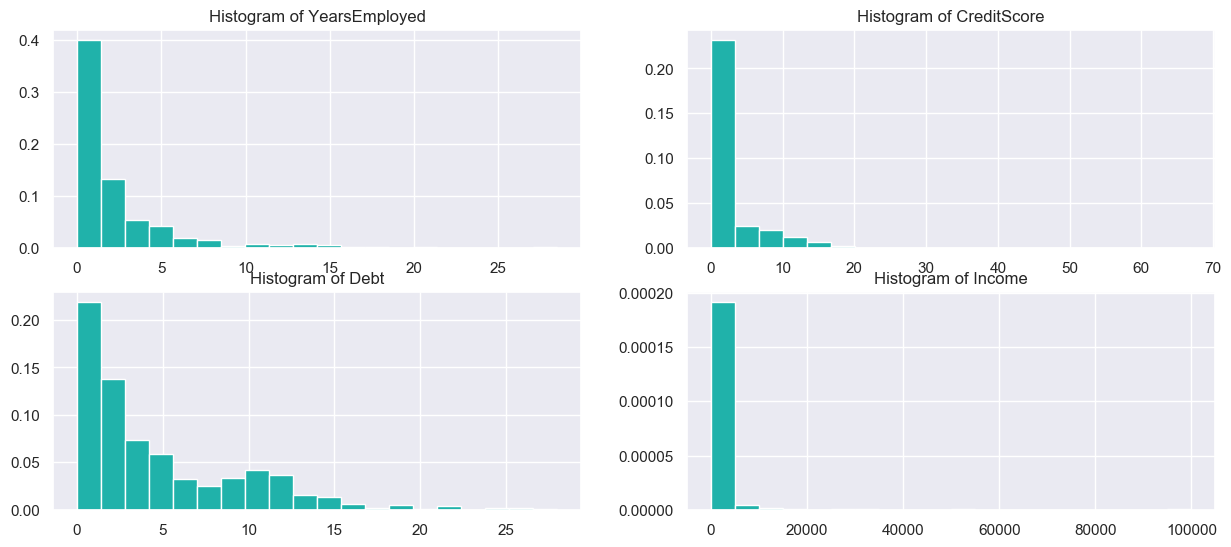

In [9]:
#histogram
plt.figure(figsize=(15,6), dpi =100,facecolor='white')
n =0
for x in ['YearsEmployed', 'CreditScore', 'Debt', 'Income']:
    n +=1
    plt.subplot(2,2,n)
    plt.hist(credit1[x], bins=20,  density= True, color= 'lightseagreen')
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2, left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9)
    plt.title('Histogram of {}'.format(x))
plt.show()

1    371
0    301
Name: Approval, dtype: int64

<Figure size 600x900 with 0 Axes>

([<matplotlib.patches.Wedge at 0x21becf207f0>,
 [Text(-0.19547449417253368, 1.1839720107029523, 'Approved'),
  Text(0.17918485137765017, -1.0853076932542078, 'Not Approved')],
 [Text(-0.11402678826731132, 0.6906503395767222, '55.21%'),
  Text(0.09773719166053645, -0.591986014502295, '44.79%')])

Text(0.5, 1.0, 'APPROVAL STATUS')

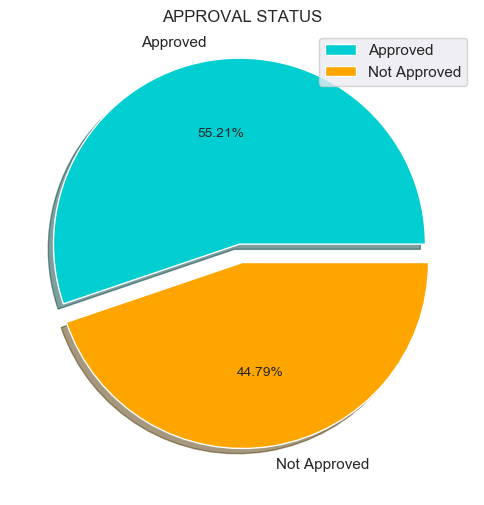

In [10]:
#Approval composition
status = credit1.Approval.value_counts()
status

#piechart
colors = ["darkturquoise", 'orange']
labels = ['Approved', 'Not Approved']
explode = [0.1, 0]


plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(status, colors = colors, explode = explode, labels = labels, autopct='%0.02f%%', shadow=True)
plt.title('APPROVAL STATUS')
plt.legend()
plt.show()

# Data Partitioning into training and testing

In [11]:
X = credit1.drop(columns = 'Approval')
y = credit1.Approval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Creation Using KNearest Neighbor Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

[0.6818948734587928, 0.6345230369889682, 0.7025740860912827, 0.6699113130002163, 0.7085442353450141, 0.6892710361237291, 0.7131083711875406, 0.7070949599826952, 0.7071382219338093, 0.7056024226692625, 0.7160501838632922, 0.7087172831494699, 0.7146441704520874, 0.7146441704520873, 0.726411421155094, 0.7205277958035908, 0.7219770711659096, 0.7190352584901579, 0.7248323599394333, 0.7189054726368159, 0.7233398226260005, 0.7248756218905472, 0.7217607614103396, 0.7203114860480208, 0.7172831494700411, 0.7232532987237725, 0.7157473502054943, 0.7172398875189272, 0.7142548128920614, 0.717196625567813]


Text(0.5, 0, 'Value of K for KNN')

Text(0, 0.5, 'Cross-Validation Accuracy')

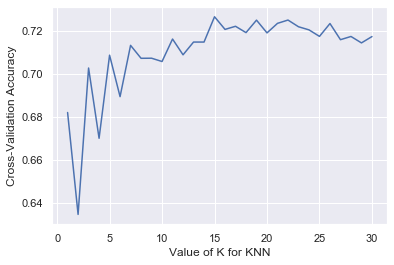

In [13]:
#search for an optimal value of K for KNN
k_score = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_score.append(scores.mean())
print (k_score)

#plot the value of K for KNN versus the Cross-Validation accuracy
k_range = range(1,31)
plt.plot(k_range , k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

Use Ensembling Method to minimize model variance

In [14]:
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier(n_neighbors = 11)
bc = BaggingClassifier(knn, n_estimators=10, max_samples=0.6, max_features=1.0, bootstrap=True, bootstrap_features=False, random_state=25)
bc.fit(X_train, y_train)
print('Bagging Score: %0.2f%% ' %(bc.score(X_test, y_test)*100))

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=11, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.6, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=25, verbose=0,
                  warm_start=False)

Bagging Score: 85.14% 


# Model Creation Using Naive Bayes Classifier

In [15]:
nb = naive_bayes.BernoulliNB()
bc = BaggingClassifier(nb, n_estimators=10, max_samples=0.6, max_features=1.0, bootstrap=True, bootstrap_features=False)
bc.fit(X_train, y_train)
print('Bagging Score: %0.2f%% ' %(bc.score(X_test, y_test)*100))

BaggingClassifier(base_estimator=BernoulliNB(alpha=1.0, binarize=0.0,
                                             class_prior=None, fit_prior=True),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.6, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

Bagging Score: 83.78% 


# Model Creation Using Random Forest Classifier

In [16]:
rf = RandomForestClassifier(n_estimators= 100)
bc = BaggingClassifier(rf, n_estimators=10, max_samples=0.6, max_features=1.0, bootstrap=True, bootstrap_features=False)
bc.fit(X_train, y_train)
print('Bagging Score: %0.2f%% ' %(bc.score(X_test, y_test)*100))

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_jobs=None,
       

Bagging Score: 84.68% 


# Model Creation Using Logistic Regression

Text(0.5, 12.5, 'Predicted labels')

Text(30.5, 0.5, 'True labels')

Text(0.5, 1, 'Confusion Matrix')

[Text(0.5, 0, 'Not Approved'), Text(1.5, 0, ' Approved')]

[Text(0, 0.5, 'Not Approved'), Text(0, 1.5, ' Approved')]

confusion accuracy: 84.23%
Minimize False Positive:  12


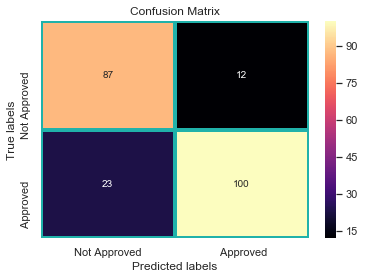

In [17]:
lr = LogisticRegression(solver='lbfgs', random_state=25)
bc = BaggingClassifier(lr, n_estimators=10, max_samples=0.6, max_features=1.0, bootstrap=True, bootstrap_features=False)
rfit = bc.fit(X_train, y_train)
y_pred = rfit.predict(X_test)
#print('Bagging Score: %0.2f%% ' %(bc.score(X_test, y_test)*100))

#model validation
cm = confusion_matrix(y_test, y_pred)

#Plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm, cmap='magma', annot=True, fmt = ',', linecolor= 'lightseagreen', linewidths=3)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Approved', ' Approved']); ax.yaxis.set_ticklabels(['Not Approved', ' Approved']);
print('confusion accuracy: %0.2f%%' %((cm.trace()/cm.sum())*100))

FP = cm[0][1]
print('Minimize False Positive: ', FP )

--The Final model can use any of the above classifiers due to there high(>83%) but closely matching accuracy scores.